In [7]:
from datasets import load_dataset, ClassLabel, concatenate_datasets
import pandas as pd
from pathlib import Path

In [5]:
# Load the dataset from hugging face
# See: https://huggingface.co/datasets/BEE-spoke-data/consumer-finance-complaints

# The consumer-finance-complaints dataset only has a train split,
# so we use the train_test_split method to split it into train and test
dataset = load_dataset("BEE-spoke-data/consumer-finance-complaints",
                       split="train")
#splits = ["train", "test"]

In [8]:
# Filter rows based on multiple column values
filtered_dataset = dataset.filter(
    lambda row: row["Company"] == "BANK OF AMERICA, NATIONAL ASSOCIATION"
    and row["Product"] in ["Credit card or prepaid card", "Mortgage"]
    and row["Consumer complaint narrative"] is not None
)

# Separate the two classes
mortgage_dataset = filtered_dataset.filter(
	lambda row: row["Product"] == "Mortgage"
)
credit_card_dataset = filtered_dataset.filter(
	lambda row: row["Product"] == "Credit card or prepaid card"
)

# Sample 500 rows from each class
mortgage_sample = mortgage_dataset.shuffle(seed = 42).select(range(500))
credit_card_sample = credit_card_dataset.shuffle(seed = 42).select(range(500))

# Combine the two samples
balanced_dataset = concatenate_datasets([mortgage_sample, credit_card_sample])

In [9]:
filtered_columns_dataset = balanced_dataset.remove_columns(
    [col for col in filtered_dataset.column_names
     if col not in ["Consumer complaint narrative", "Product"]]
)

filtered_columns_dataset

Dataset({
    features: ['Product', 'Consumer complaint narrative'],
    num_rows: 1000
})

Convert dataset to a pandas Dataframe.

In [10]:
# Convert the dataset to a pandas DataFrame
df = filtered_columns_dataset.to_pandas()

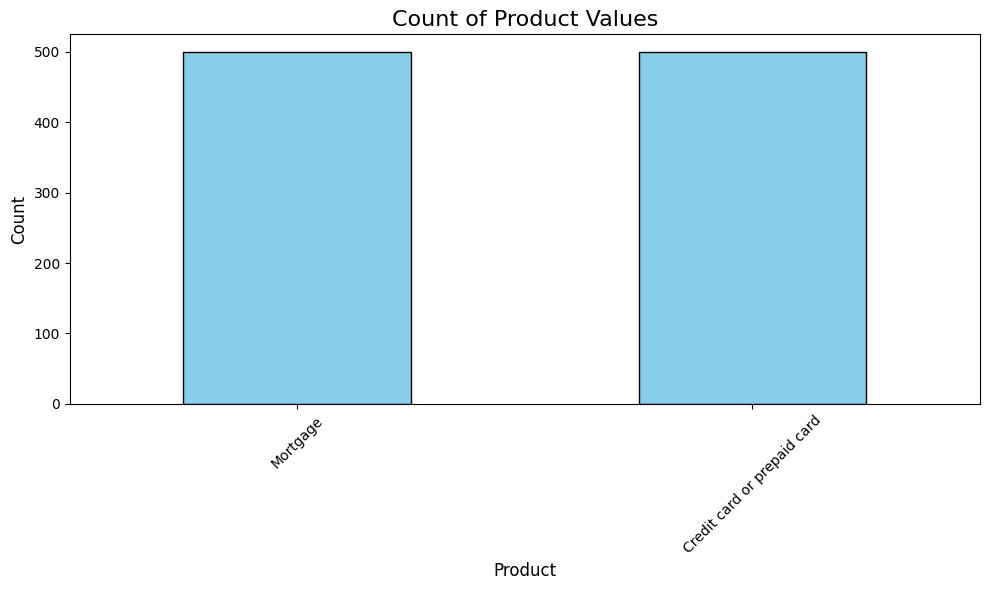

In [11]:
import matplotlib.pyplot as plt

# Count occurrences of each Product value
product_counts = df["Product"].value_counts()

# Plot the counts as a bar chart
plt.figure(figsize=(10, 6))
product_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Add labels and title
plt.title("Count of Product Values", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Output the dataset that will be used for fine-tuning as a csv file for later use

In [12]:
# Define the data folder and CSV file path
data_folder = Path("data")

# Use pathlib to define a file path
output_path = data_folder / "filtered_dataset.csv"

# Export the DataFrame to CSV
df.to_csv(output_path, index=False)

print(f"Filtered dataset successfully saved to {output_path}")

Filtered dataset successfully saved to data\filtered_dataset.csv
